<a href="https://colab.research.google.com/github/Khanarfan1234/CodeAlpha_Titanic_Classification/blob/main/CodeAlpha_Project_Data_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Pre-processing**


Import all the necessary libraries

In [7]:
import pandas as pd                    # For data manipulation and analysis
import numpy as np                     # For numerical operations
import seaborn as sns                  # For data visualization (heatmaps, boxplots)
import matplotlib.pyplot as plt        # For creating plots and visualizations
from sklearn.preprocessing import MinMaxScaler  # For feature scaling
from sklearn.model_selection import train_test_split  # For splitting the dataset


Load data set

In [2]:
import pandas as pd

df = pd.read_csv('/content/Data.csv')


Before proceeding, it’s crucial to understand the data's structure.


In [3]:
print(df.head())  # Display the first 5 rows
print(df.info())  # Summary of the dataset
print(df.describe())  # Statistical summary of numeric columns


   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes
None
             Age        Salary
count   9.000000      9.000000
mean   38.777778  63777.777778
std     7.693793  12265.579662
min    27.000000  48000.000000
25%    35.000000  54000.000000
50%    38.000000  61000.000000
75%    44.000000  72000.000000
max    50.000000  83000.000000


In [4]:
print(df.shape)


(10, 4)


Handle Missing Values

In [5]:
missing_values = df.isnull().sum()
print(missing_values)


Country      0
Age          1
Salary       1
Purchased    0
dtype: int64


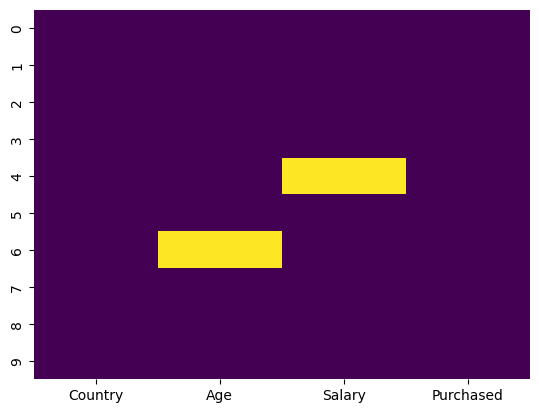

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


Heat map

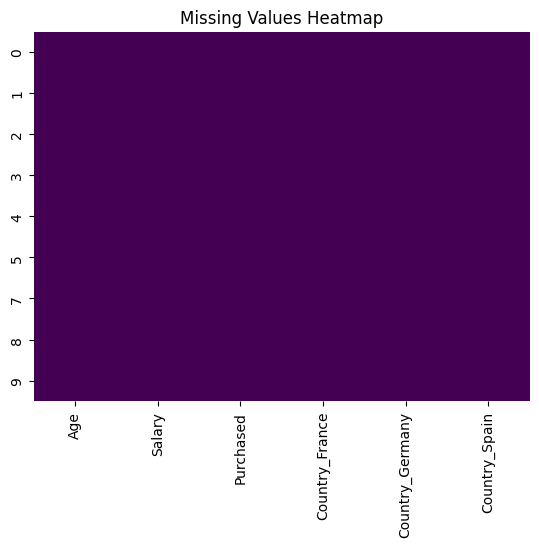

In [46]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


Boxplot for outlier detection

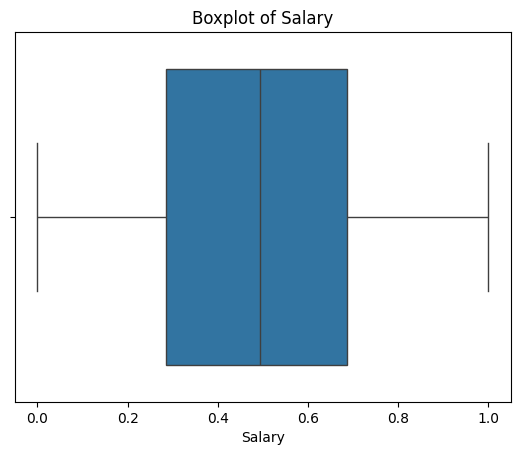

In [47]:
sns.boxplot(x=df['Salary'])
plt.title('Boxplot of Salary')
plt.show()


Histogram before and after missing values

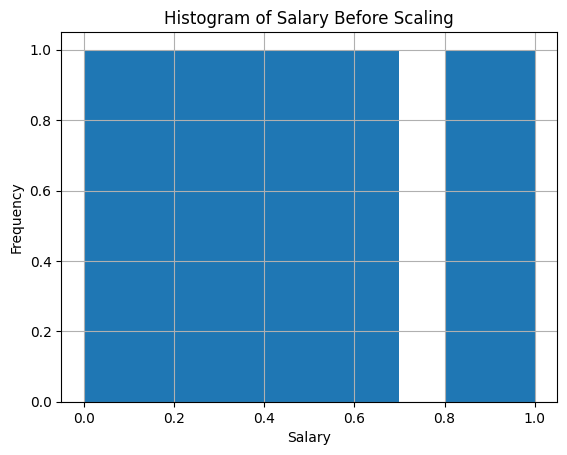

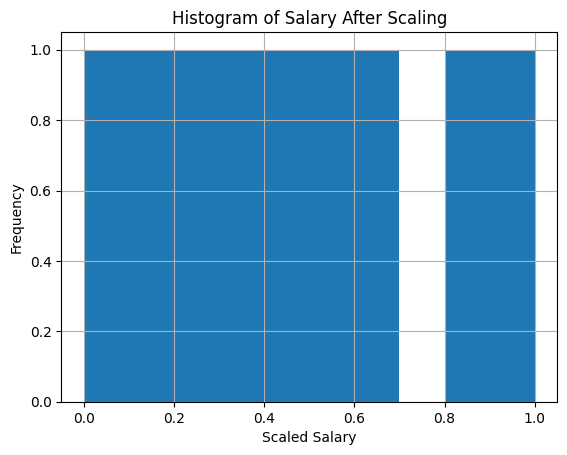

In [48]:
df['Salary'].hist(bins=10)
plt.title('Histogram of Salary Before Scaling')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

df['Salary'].hist(bins=10)
plt.title('Histogram of Salary After Scaling')
plt.xlabel('Scaled Salary')
plt.ylabel('Frequency')
plt.show()


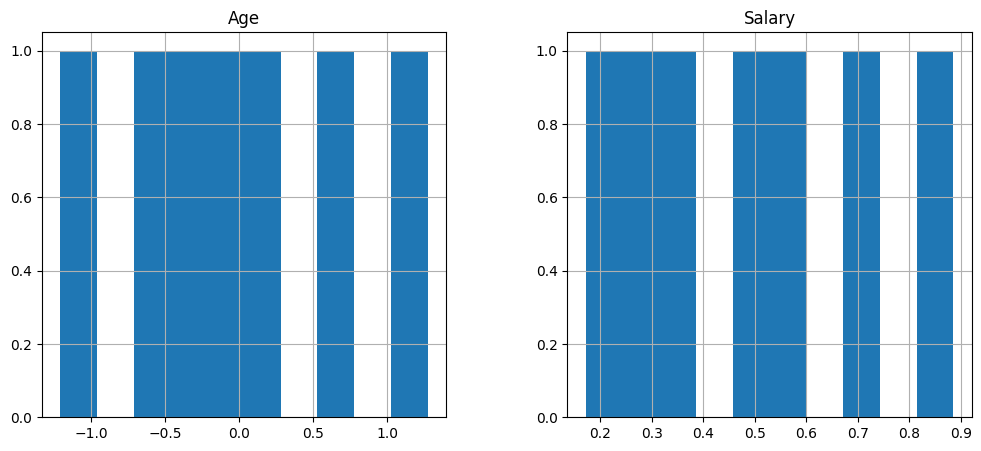

In [49]:
X_train[['Age', 'Salary']].hist(bins=10, figsize=(12, 5))
plt.show()


Remove Missing Values

In [8]:
df.dropna(axis=1, thresh=int(0.6 * len(df)), inplace=True)  # Drops columns with more than 40% missing values


In [9]:
df.dropna(axis=0, thresh=int(0.8 * len(df.columns)), inplace=True)  # Drops rows with more than 20% missing values


Impute missing values

In [31]:
# Impute missing numeric values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

# Impute missing categorical values
df['Purchased'].fillna(df['Purchased'].mode()[0], inplace=True)


<ipython-input-31-bd29f94bffb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-31-bd29f94bffb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'].fillna(df['Salary'].mean(), inplace=True)
<ipython-input-31-bd29f94bffb9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purchased'].fillna(df['Purchased'].mode()[0], inplace=True)


Handle outliers

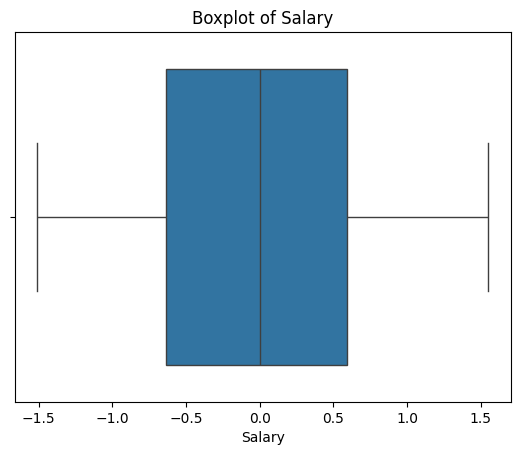

In [32]:
# Boxplot for Salary to identify outliers
sns.boxplot(x=df['Salary'])
plt.title('Boxplot of Salary')
plt.show()


Handle outliers by Capping

<ipython-input-34-fdc6d2b08667>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'] = np.where(df['Salary'] > upper_bound, upper_bound, df['Salary'])
<ipython-input-34-fdc6d2b08667>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'] = np.where(df['Salary'] < lower_bound, lower_bound, df['Salary'])


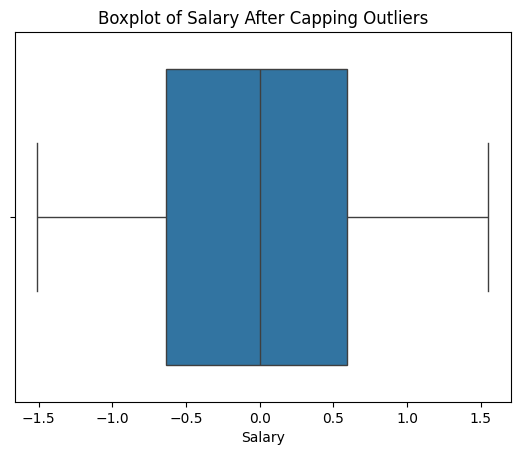

In [34]:
import numpy as np

# Calculate IQR for Salary
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['Salary'] = np.where(df['Salary'] > upper_bound, upper_bound, df['Salary'])
df['Salary'] = np.where(df['Salary'] < lower_bound, lower_bound, df['Salary'])

# Visualize Salary after capping outliers
sns.boxplot(x=df['Salary'])
plt.title('Boxplot of Salary After Capping Outliers')
plt.show()


Normalize or scale features

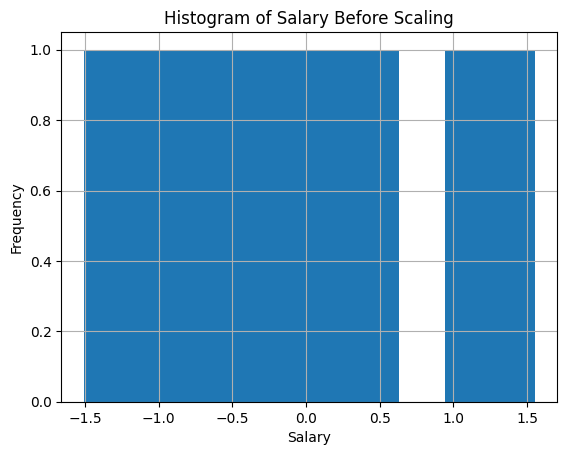

In [35]:
# Histogram for Salary before scaling
df['Salary'].hist(bins=10)
plt.title('Histogram of Salary Before Scaling')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Salary'] = scaler.fit_transform(df[['Salary']])


<ipython-input-36-312616452804>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'] = scaler.fit_transform(df[['Salary']])


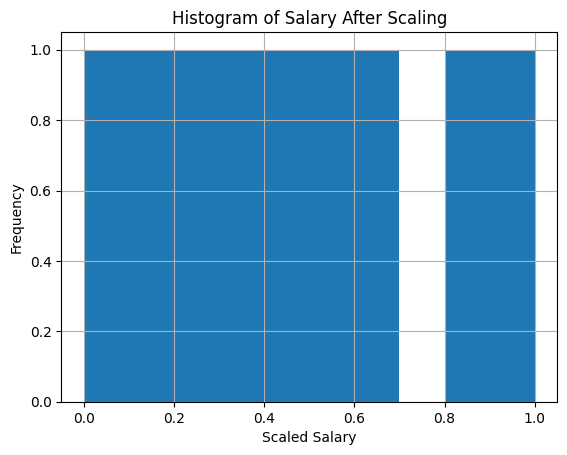

In [37]:
# Histogram for Salary after scaling
df['Salary'].hist(bins=10)
plt.title('Histogram of Salary After Scaling')
plt.xlabel('Scaled Salary')
plt.ylabel('Frequency')
plt.show()


Encode catagorical varialbles

In [39]:
# One-Hot Encoding for Country
df = pd.get_dummies(df, columns=['Country'])
print(df.head())

# Label Encoding for Purchased
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Purchased'] = label_encoder.fit_transform(df['Purchased'])
print(df.head())


        Age    Salary Purchased  Country_France  Country_Germany  \
0  0.719931  0.685714        No            True            False   
1 -1.623675  0.000000       Yes           False            False   
2 -1.210098  0.171429        No           False             True   
3 -0.107224  0.371429        No           False            False   
4  0.168495  0.492857       Yes           False             True   

   Country_Spain  
0          False  
1           True  
2          False  
3           True  
4          False  
        Age    Salary  Purchased  Country_France  Country_Germany  \
0  0.719931  0.685714          0            True            False   
1 -1.623675  0.000000          1           False            False   
2 -1.210098  0.171429          0           False             True   
3 -0.107224  0.371429          0           False            False   
4  0.168495  0.492857          1           False             True   

   Country_Spain  
0          False  
1           True  
2    

Split data into training and testing sets

In [40]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(['Purchased'], axis=1)
y = df['Purchased']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(7, 5) (2, 5)


Review and validate preprocessed data sets



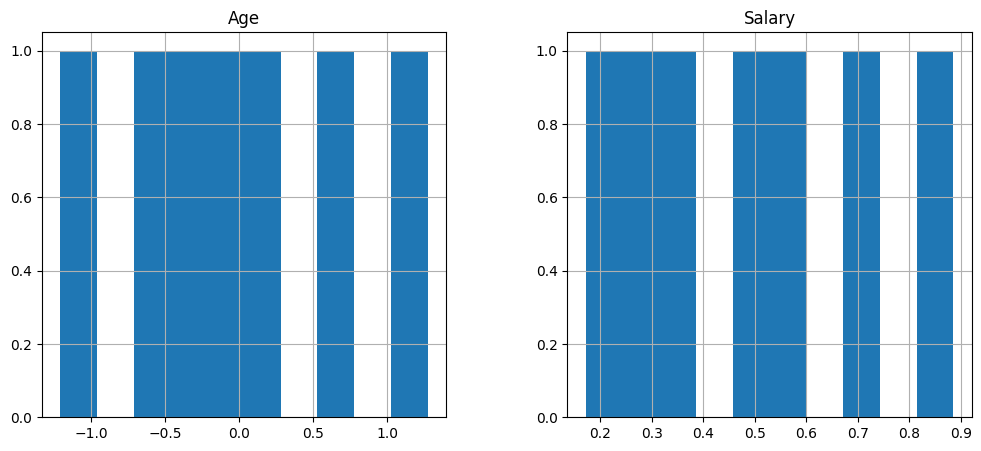

In [41]:
# Histograms for Age and Salary after preprocessing
X_train[['Age', 'Salary']].hist(bins=10, figsize=(12, 5))
plt.show()


Save preprocessed data

In [42]:
# Save the preprocessed training and testing data
X_train.to_csv('preprocessed_train_data.csv', index=False)
X_test.to_csv('preprocessed_test_data.csv', index=False)


### Outcomes of Data Preprocessing

1. **Cleaned Dataset:**
   - Missing values are handled appropriately, either by imputation or removal, leading to a more robust dataset for modeling.
   - Outliers are identified and treated, reducing their potential negative impact on model performance.

2. **Normalized/Scaled Features:**
   - Numerical features are scaled to a similar range, which helps models that rely on distance metrics (e.g., K-Nearest Neighbors, SVM) perform better.
   - Normalization can also speed up the convergence of gradient-based models like logistic regression and neural networks.

3. **Encoded Categorical Variables:**
   - Categorical variables are transformed into a format that can be used by machine learning algorithms, enabling the model to make sense of non-numerical data.

4. **Training and Testing Data:**
   - The dataset is split into training and testing sets, which allows you to train your model on one portion of the data and evaluate its performance on unseen data.
   - This helps prevent overfitting and provides a more accurate estimate of model performance in real-world scenarios.

5. **Improved Data Quality:**
   - The overall quality and consistency of the data are improved, making it more suitable for accurate modeling and analysis.

### Benefits of Preprocessing the Dataset

1. **Enhanced Model Accuracy:**
   - Properly preprocessed data leads to better model accuracy as the models are trained on clean, scaled, and well-structured data.
   - By removing or capping outliers, you reduce the likelihood of your model being skewed by extreme values.

2. **Faster Model Convergence:**
   - Scaling and normalizing data can lead to faster convergence of optimization algorithms, especially in gradient descent-based models.

3. **Improved Model Generalization:**
   - By splitting the data into training and testing sets, you can ensure that your model generalizes well to new, unseen data, reducing the risk of overfitting.

4. **Reduced Bias and Variance:**
   - Handling missing values and outliers reduces the risk of bias and variance in your models, leading to more reliable and stable predictions.

5. **Better Interpretability:**
   - Preprocessed data often leads to simpler and more interpretable models, as the data is more consistent and less noisy.

6. **Ease of Feature Engineering:**
   - A clean and well-preprocessed dataset makes it easier to perform feature engineering, which can further improve model performance.

7. **Consistency Across Models:**
   - Consistent preprocessing ensures that different models trained on the same data will have similar input distributions, making it easier to compare model performance.
